Train RMSE: 748.6313683556266
Test RMSE: 677.7632156824139


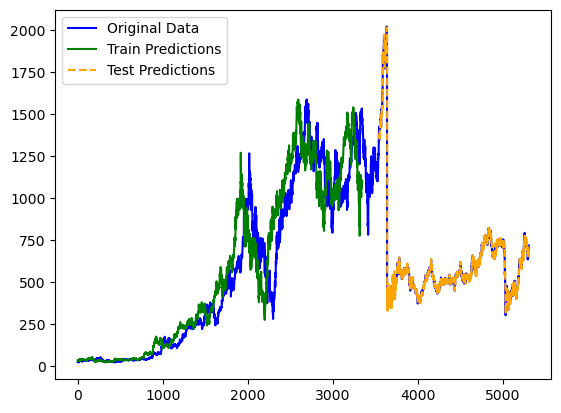

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
import math
import pickle

# Load the data
data = pd.read_csv('AXIS.csv')
df1 = data['Prev Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)

# Split the data into train and test sets
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

# Create time series dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Build and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)



# Plot the original data and predictions
plt.plot(scaler.inverse_transform(df1), color='blue', label='Original Data')
plt.plot(train_predict, color='green', label='Train Predictions')
plt.plot(range(len(df1)-len(test_predict), len(df1)), test_predict, color='orange', linestyle='dashed', label='Test Predictions')
plt.legend()
plt.show()


In [4]:

with open('stock.pkl', 'wb') as f:
    pickle.dump({'model': model, 'scaler': scaler}, f)